In [1]:
import pandas as pd

In [2]:
df_original = pd.read_csv ('seek_australia.csv')
df_original

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Hospitality & Tourism,Sydney,Radisson Blu Plaza Hotel Sydney,AU,seek,Hotel snapshot The Radisson Blu Plaza Sydney ...,Bar Supervisor,Full Time,2018-04-11T04:20:40Z,"Annualised salary, uniform + Super","CBD, Inner West & Eastern Suburbs",https://www.seek.com.au/job/35958503
29996,CEO & General Management,ACT,Airservices Australia,AU,seek,The Organisation Airservices is a government ...,Deputy Board Secretary,Full Time,2018-04-11T04:00:49Z,Salary package to be negotiated,NaN,https://www.seek.com.au/job/35958100
29997,Accounting,Melbourne,The Hassett Group,AU,seek,ABOUT THE COMPANY AND ROLE Our client is one o...,Corporate Accountant,Full Time,2018-04-11T02:45:37Z,$110k Package On Offer!,CBD & Inner Suburbs,https://www.seek.com.au/job/35956991
29998,Government & Defence,ACT,SOS Recruitment,AU,seek,Long term contract for 12 months with possibl...,APS 6 & EL1 Account Managers,Contract/Temp,2018-04-11T04:55:16Z,NaN,NaN,https://www.seek.com.au/job/35959184


# Data exploration

In [3]:
# delete irrelevant features
# use gensim to train word embeddings, use TSE to visualize some examples

Reduce dataframe to necessary features

In [4]:
features_to_delete = ['job_board','geo','url']
df = df_original.drop(features_to_delete, axis=1)

Train word embeddings via GloVe (only method using gensim library)

In [6]:
import sys
assert sys.version_info[0]==3
assert sys.version_info[1] >= 5

from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

START_TOKEN = '<START>'
END_TOKEN = '<END>'

np.random.seed(0)
random.seed(0)

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/charlotteschmidt/nltk_data...


In [11]:
def load_embedding_model():
    """ Load GloVe Vectors
        Return:
            wv_from_bin: All 400000 embeddings, each lengh 200
    """
    import gensim.downloader as api
    wv_pretrained = api.load("glove-wiki-gigaword-200")
    print("Loaded vocab size %i" % len(wv_pretrained))
    print("The loaded object is of type %s" % str(type(wv_pretrained)))
    return wv_pretrained

In [12]:
# runs long (approx 8 minutes)
wv_pretrained = load_embedding_model()

[====----------------------------------------------] 9.3% 23.4/252.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 26.7% 67.2/252.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 46.5% 117.1/252.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 70.3% 177.1/252.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.4% 238.0/252.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Loaded vocab size 400000
The loaded object is of type <class 'gensim.models.keyedvectors.KeyedVectors'>


# Data pre-processing

# Task 1

Derive target variable

In [7]:
df['job_type_target'] = df['job_type']

In [8]:
df.loc[df['job_type_target'] != 'Full Time', 'job_type_target'] = 'Other'

Analyse class distribution

<AxesSubplot:>

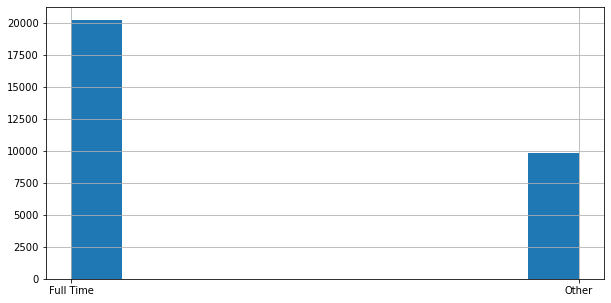

In [9]:
df['job_type_target'].hist()

In [10]:
# Class 'Full Time' is twice as large as 'Other'. Verify based on literature if such a distribution is too
# imbalanced for this learning task 

# Task 2